# Lab_6

In [98]:
from random import *
import numpy as np

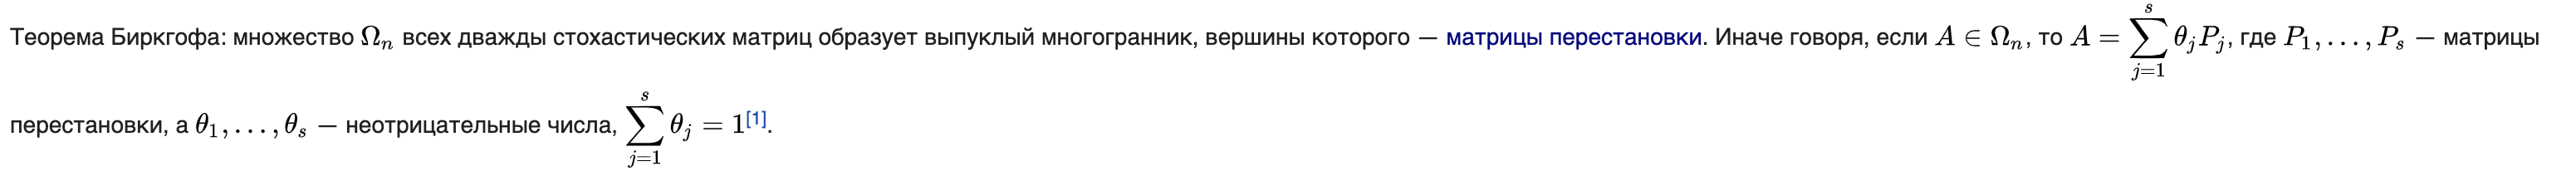

In [99]:
agents_num = 10
min_weight = 1 
max_weight = 30
eps = 10 ** (-4)

In [100]:
seed()
float_formatter = "{:8.4f}".format
int_formatter = "{:4}".format
np.set_printoptions(edgeitems=1, precision=4, linewidth=120, formatter={'float_kind':float_formatter, 'int_kind':int_formatter})

### Stochastic matrix functions

In [101]:
def generate_random_permutation_matrix(n):
    G = []
    for _ in range(n):
        G.append([0] * n)
    permutation = []
    elems_set = set(range(n))
    while elems_set:
        elem = choice(list(elems_set))
        permutation.append(elem)
        elems_set.remove(elem)

    for i in range(n):
        G[i][permutation[i]] = 1
    return G

def generate_stochastic_coefs(n):
    left = 10000
    coefs = [1] * n
    left -= n
    for i in range(n):
        if left != 0:
            coefs[i] += randrange(0, left)
            left -= (coefs[i] - 1)
    coefs [-1] += left
    shuffle(coefs)
    return [coef / 10000 for coef in coefs]

def generate_row_stochastic_matrix(agents_num):
    matrix = []
    for i in range (agents_num):
        matrix.append(generate_stochastic_coefs(agents_num))
    return np.array(matrix)
        

def generate_random_stochastic_matrix(n):
    k = randint(1, n**2 - 2 * n + 2)
    coefs = generate_stochastic_coefs(k)
    permutation_matrixes = []
    for i in range(k):
        while True:
            matrix = generate_random_permutation_matrix(n)
            if matrix not in permutation_matrixes:
                permutation_matrixes.append(matrix)
                break
    permutation_matrixes = np.asanyarray(permutation_matrixes)
    
    G = np.zeros((n, n))
    for i in range(k):
        G += coefs[i] * permutation_matrixes[i]
    return G

def is_stochastic(G):
    return np.all(np.sum(G, axis=0)) == 1.0 and np.all(np.sum(G, axis=1)) == 1.0

In [102]:
generate_stochastic_coefs(5)
generate_row_stochastic_matrix(10)

array([[  0.0011,   0.0221,   0.4505,   0.0680,   0.0277,   0.0415,   0.0041,   0.0007,   0.3430,   0.0413],
       [  0.6361,   0.0973,   0.0005,   0.0014,   0.0005,   0.0005,   0.0001,   0.1109,   0.0028,   0.1499],
       [  0.0530,   0.0006,   0.0009,   0.0001,   0.0032,   0.0001,   0.8338,   0.1077,   0.0004,   0.0002],
       [  0.0555,   0.0012,   0.6310,   0.0002,   0.0001,   0.0055,   0.3048,   0.0004,   0.0001,   0.0012],
       [  0.0002,   0.2868,   0.0002,   0.2333,   0.0498,   0.0030,   0.0003,   0.4240,   0.0020,   0.0004],
       [  0.0506,   0.0093,   0.0001,   0.0002,   0.0096,   0.0001,   0.9294,   0.0004,   0.0002,   0.0001],
       [  0.0007,   0.0491,   0.0002,   0.0001,   0.0055,   0.0033,   0.0004,   0.0382,   0.9021,   0.0004],
       [  0.0011,   0.0038,   0.0013,   0.1266,   0.2667,   0.0002,   0.0004,   0.5855,   0.0013,   0.0131],
       [  0.9704,   0.0009,   0.0002,   0.0004,   0.0001,   0.0003,   0.0112,   0.0009,   0.0005,   0.0151],
       [  0.2881,  

### Game functions

In [103]:
def stop_func(prev, cur, eps):
    for i in range(len(cur)):
        if abs(prev[i] - cur[i]) >= eps:
            return False
    return True

def model_game_without_influence(trust_matrix, agents_opinion, eps):
    prev_state = np.copy(agents_opinion)
    cur_iter = 0
    while True:
        cur_iter += 1
        cur_state = trust_matrix @ prev_state
        print ("{:2d}".format(cur_iter), cur_state)
        if stop_func(prev_state, cur_state, eps):
            return cur_state
        prev_state = cur_state
    return cur_state

def generate_influence_agents_1_2_players(agents_num):
    count_1 = randint(1, agents_num - 1)
    count_2 = randint(1, agents_num - 1)
    agents = np.arange(agents_num)
    
    np.random.shuffle(agents)
    pre_players_1 = np.copy(agents[:count_1])
    
    np.random.shuffle(agents)
    pre_players_2 = np.copy(agents[:count_2])
    
    players_1 = []
    players_2 = []
    
    for i in range(len(pre_players_1)):
        for j in range (len(pre_players_2)):
            if pre_players_1[i] == pre_players_2[j]:
                if (getrandbits(1)):
                    pre_players_2[j] = -1
                else: pre_players_1[i] = -1
                break
    for agent in pre_players_1:
        if agent >= 0: players_1.append(agent)
            
    for agent in pre_players_2:
        if agent >= 0: players_2.append(agent)
    
    small, big = (players_1, players_2) if len(players_1) < len(players_2) else (players_2, players_1)
    if len(small) == 0:
        small.append(big[0])
        big = big[1:]
    return {'influence': [players_1, players_2], 'values': [randint(0, 100), randint(-100, 0)]}
       
            

def print_influence_1_2_players(influence):
    influence_agents = influence['influence']
    influence_values = influence['values']
    for player in range (2):
        print ("For {} player: [{}], value: {}".format(player, influence_agents[player], influence_values[player]))
        
def correct_opinion(agents_opinion, influence):
    opinion = np.copy(agents_opinion)
    influence_agents = influence['influence']
    influence_values = influence['values']
    for i in range(len(agents_opinion)):
        if i in influence_agents[0] or influence_agents[1]:
            opinion[i] = influence_values[0] if i in influence_agents[0] else influence_values[1]
    return opinion

def model_game_with_influence(trust_matrix, agents_opinion, influence, eps):
    agents_opinion = correct_opinion(agents_opinion, influence)
    return model_game_without_influence(trust_matrix, agents_opinion, eps)

def A_inf(A_0):
    A=A_0
    key = True
    while key:
        key = False
        for row1 in A:
            for row2 in A:
                for elem in row1-row2:
                    if abs(elem)> eps:
                        key = True
        if key:
            A = A @ A
    return A
    

## Game

In [104]:
agents_opinion = np.random.randint(low=min_weight, high=max_weight, size=agents_num)
print ("Initial agents opinion: ", agents_opinion, end='\n\n')

A_matrix = generate_row_stochastic_matrix(agents_num)
print(trust_matrix, end='\n\n')
if is_stochastic(trust_matrix):
    print ("Matrix is stochastic")
else:
    print ("Error while generating stochastic matrix")

Initial agents opinion:  [   3   29   20   25   12   25    2   23   29   23]

[[  0.0005   0.0006   0.0715   0.0021   0.5132   0.0007   0.0728   0.0305   0.2851   0.0230]
 [  0.3125   0.0066   0.2365   0.0004   0.0004   0.0032   0.0002   0.0008   0.4388   0.0006]
 [  0.0674   0.0228   0.0008   0.0007   0.3475   0.0018   0.0003   0.0087   0.1618   0.3882]
 [  0.1679   0.3533   0.2854   0.0005   0.0586   0.0002   0.0002   0.0674   0.0006   0.0659]
 [  0.0059   0.0680   0.0528   0.0005   0.0007   0.2824   0.0072   0.5145   0.0679   0.0001]
 [  0.0006   0.1979   0.3517   0.0657   0.0003   0.0899   0.0002   0.2889   0.0003   0.0045]
 [  0.0007   0.0675   0.0002   0.1839   0.0068   0.3875   0.0684   0.0003   0.0019   0.2828]
 [  0.3739   0.2825   0.0002   0.0793   0.0047   0.0003   0.0008   0.0657   0.0309   0.1617]
 [  0.0674   0.0004   0.0002   0.0028   0.0676   0.1620   0.6641   0.0228   0.0124   0.0003]
 [  0.0032   0.0004   0.0007   0.6641   0.0002   0.0720   0.1858   0.0004   0.0003   

## Game without influence 

In [105]:
game_without_influence = model_game_without_influence(A_matrix, agents_opinion, eps)

 1 [ 17.3718  17.7625  27.5576   2.4038   4.9844  20.2167  14.2504  26.1116   2.6859  22.4096]
 2 [ 10.5320  21.6269   4.3084  14.6832  15.4376   7.2610   8.7528  19.3813  14.6335  21.2311]
 3 [ 13.2923   9.0754  14.9246   9.1071  11.4572  15.6796  15.7397  20.0971   8.7421  20.0500]
 4 [ 11.7568  14.7031   9.5426  15.3621  13.2288  10.5357  12.9103  12.4254  15.6725  17.4467]
 5 [ 13.8015  11.3661  15.3552  12.7805  12.0657  14.0393  13.0251  13.8776  12.8314  16.3080]
 6 [ 13.3941  14.6252  12.8768  13.1089  13.4968  12.3201  12.4192  12.2359  13.0782  15.1790]
 7 [ 13.2416  13.2350  13.0547  12.5653  13.3457  13.4761  13.2605  13.8260  12.4480  14.8548]
 8 [ 12.9859  13.3122  12.5718  13.2579  13.2682  13.0673  13.4182  13.3878  13.2556  14.3874]
 9 [ 13.1943  12.9505  13.2612  13.3619  13.0570  13.2603  13.2792  13.3119  13.3943  14.0399]
10 [ 13.3189  13.2993  13.3752  13.2652  13.1796  13.1572  13.1055  13.0739  13.2765  13.7566]
11 [ 13.2948  13.3601  13.2627  13.1347  13.2832  

In [106]:
print ("Game without external influence:\n[{}]".format(game_without_influence))

Game without external influence:
[[ 13.2574  13.2574  13.2574  13.2574  13.2574  13.2574  13.2574  13.2574  13.2574  13.2576]]


## Game with influence 1 and 2 players

In [107]:
influence = generate_influence_agents_1_2_players(agents_num)
print_influence_1_2_players(influence)

For 0 player: [[6, 9, 5]], value: 68
For 1 player: [[4, 1, 0, 3, 2, 7]], value: -66


In [108]:
print ("Initial agents opinion: {}".format(agents_opinion))
corrected_agents_opinion = correct_opinion(agents_opinion, influence)
print ("Corrected initial agents opinion: {}".format(corrected_agents_opinion))

Initial agents opinion: [   3   29   20   25   12   25    2   23   29   23]
Corrected initial agents opinion: [ -66  -66  -66  -66  -66   68   68  -66  -66   68]


In [109]:
game_with_influence = model_game_with_influence(A_matrix, agents_opinion, influence, eps)

 1 [-56.4458 -50.0406 -65.7990  49.5348 -60.9348 -57.1560 -61.1358 -65.7722  63.0554  30.3862]
 2 [  0.3958 -52.2599  49.8455 -60.3996 -56.9561 -21.0731 -60.7409 -53.2287 -61.1384   6.5709]
 3 [-32.8350  16.5885 -59.7074 -52.8302 -12.4327 -55.1120 -55.0733 -50.3038 -57.6383  -4.5543]
 4 [-43.3673 -43.3181 -55.0991 -51.5369 -30.9839 -24.2372 -20.0170  -6.9447 -54.6580  -4.8823]
 5 [-44.2079 -43.1881 -50.9207 -23.2313 -39.7692 -39.6378 -27.2328 -32.9964 -21.1305 -15.7819]
 6 [-31.8823 -43.7072 -22.7912 -29.5572 -42.5048 -34.6131 -38.6167 -39.9298 -28.0038 -23.6503]
 7 [-30.7185 -27.8713 -29.2586 -37.8008 -33.9681 -37.7617 -41.7288 -41.7520 -38.2192 -28.0270]
 8 [-34.8373 -30.7263 -38.1415 -40.1854 -31.9305 -34.5241 -35.3111 -32.2946 -41.2839 -28.4572]
 9 [-37.2343 -35.6699 -40.3303 -35.2066 -34.3718 -34.7335 -32.1378 -31.6102 -35.3501 -29.6386]
10 [-35.6390 -37.5549 -35.1246 -32.8242 -36.4558 -34.8892 -33.9715 -34.5763 -32.3871 -31.5274]
11 [-33.9803 -34.9805 -32.7043 -34.2189 -35.6645 -

In [110]:
print ("Game with external influence:\n[{}]".format(game_with_influence))


Game with external influence:
[[-34.7858 -34.7858 -34.7859 -34.7859 -34.7858 -34.7858 -34.7858 -34.7858 -34.7859 -34.7857]]


### Вывести матрицу А

In [111]:
A_inf_matrix = A_inf(A_matrix)
print("A_inf:\n{}".format(A_inf_matrix))
print()
print("A_inf * corrected_agents_opinion = \n{}".format(A_inf_matrix @ corrected_agents_opinion))
print()
print (game_with_influence - (A_inf_matrix @ corrected_agents_opinion) <=eps*5)
print("A^(t)*x(0) = A*x(t), where t-> to inf")

A_inf:
[[  0.2494   0.0538   0.0440   0.1351   0.1844   0.0140   0.1647   0.0596   0.0407   0.0543]
 [  0.2494   0.0538   0.0440   0.1351   0.1844   0.0140   0.1647   0.0596   0.0407   0.0543]
 [  0.2494   0.0538   0.0440   0.1351   0.1844   0.0140   0.1647   0.0596   0.0407   0.0543]
 [  0.2494   0.0538   0.0440   0.1351   0.1844   0.0140   0.1647   0.0596   0.0407   0.0543]
 [  0.2494   0.0538   0.0440   0.1351   0.1844   0.0140   0.1647   0.0596   0.0407   0.0543]
 [  0.2494   0.0538   0.0440   0.1351   0.1844   0.0140   0.1647   0.0596   0.0407   0.0543]
 [  0.2494   0.0538   0.0440   0.1351   0.1844   0.0140   0.1647   0.0596   0.0407   0.0543]
 [  0.2494   0.0538   0.0440   0.1351   0.1844   0.0140   0.1647   0.0596   0.0407   0.0543]
 [  0.2494   0.0538   0.0440   0.1351   0.1844   0.0140   0.1647   0.0596   0.0407   0.0543]
 [  0.2494   0.0538   0.0440   0.1351   0.1844   0.0140   0.1647   0.0596   0.0407   0.0543]]

A_inf * corrected_agents_opinion = 
[-34.7864 -34.7856 -34.78